# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie
 
Soortelijke warmte is de hoeveelheid warmte energie (in J) die nodig is om 1 kg van een bepaalde stof met 1 K op te warmen. De eenheid is dus c in (J/(kg*K)). De vergelijking die dit aan warmtehoeveelheid relateerd is Q=mcΔT met Q de toegevoegde warmtehoeveelheid in J, m de massa in kg en ΔT de temperatuurverandering in K.

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een thermometer.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer
- Weegschaal
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```
# Procedure: Bepaling van de soortelijke warmte van water

## 1. Massa van het water bepalen
1. Weeg de lege maatbeker.
2. Vul de maatbeker met 400–600 mL water.
3. Weeg de maatbeker opnieuw.
4. Bereken de massa van het water:

m_water = m_beker+water − m_beker

## 2. Temperatuursensor plaatsen
1. Plaats de thermometer of temperatuursensor in het midden van het water.
2. Wacht 20–30 seconden tot de meting stabiel is.
3. Noteer de begintemperatuur.

## 3. Verwarmingselement voorbereiden
1. Hang of klem de *10 Ω, 10 W* weerstand volledig onder water.
2. Zorg dat de weerstand de bekerwand niet raakt.
3. Zet de roerder aan zodat de warmte gelijkmatig verdeeld wordt.

## 4. Start van het experiment
1. Start de stopwatch.
2. Zet de voeding aan op 12 V.  (De spanning mag alleen aan wanneer de weerstand al in het water zit.)
3. Noteer voor 5 minuten elke 30 de temperatuur van het water.

## 5. Elektrisch vermogen bepalen
1. Meet de spanning over de weerstand (U).
2. Meet de stroom door de weerstand (I).
3. Bereken het vermogen:

P = U * I

4. Bereken de toegevoerde energie:

E = P * t

waarbij t de totale opwarmtijd is in seconden.

## 6. Stop het experiment
1. Zet de voeding uit.
2. Haal de weerstand voorzichtig uit het water (hij blijft heet).

## 7. Bereken de soortelijke warmte van water
Gebruik:

c = E / (m * ΔT)

waarbij:
- E = toegevoerde energie (J)
- m = massa van het water (kg)
- ΔT = temperatuurstijging (°C)
- c = soortelijke warmte (J/(kg*K)


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
De data wordt geplot in een tijd, toegevoegde energie diagram. Hier kan een lineare verband y=ax+b aan worden gefit. Fitparameter a kan dan worden gebruikt om c te bepalen met verband c=1/(m*a).

# Resultaten


P = 14.88 W
Energies (J): [   0.   446.4  892.8 1339.2 1785.6 2232.  2678.4 3124.8 3571.2 4017.6
 4464. ]


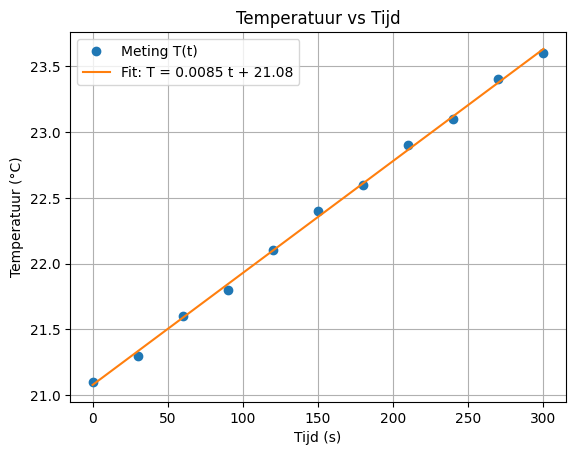


Stijgsnelheid dT/dt = 0.0085 °C/s


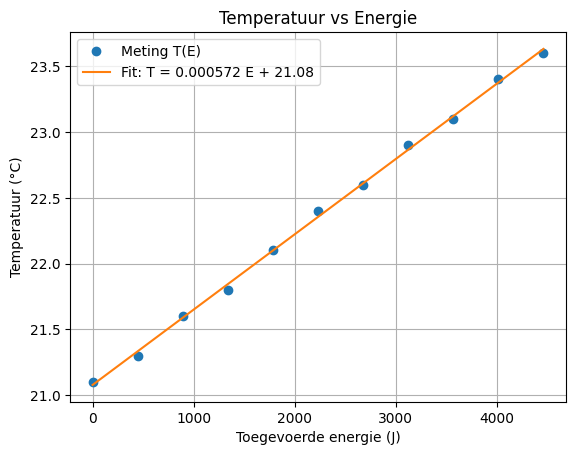


Helling uit T(E) = 5.722548e-04 1/(m*c)

Berekende soortelijke warmte c = 4743.41 J/(kg·°C)


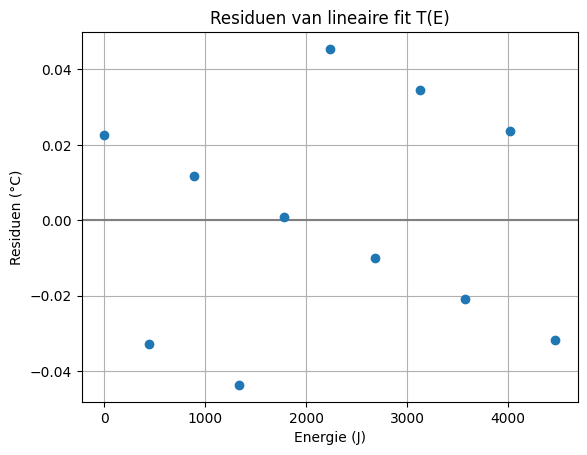

In [3]:
# -----------------------------------------------
# Bepaling soortelijke warmte van water - Python
# -----------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# maatbeker zonder water: 139.2 gram
# maatbeker met water: 507.6 gram
# begintemperatuur = 21.1 celcius
# temperatuur elke 30 seconde (voor 5 min): 21.1, 21.3, 21.6, 21.8, 22.1, 22.4, 22.6, 22.9, 23.1, 23.4, 23.6
# eindtemperatuur = 23.6 graden celcius

# =====================================================
# 1. JOUW MEETGEGEVENS INVULLEN
# =====================================================
# --- Gegevens invullen ---
# Tijd in seconden
t = np.arange(0,301,30)
# Gemeten temperatuur in °C
T = np.array([21.1, 21.3, 21.6, 21.8, 22.1, 22.4, 22.6, 22.9, 23.1, 23.4, 23.6])
T_eind = 23.6
T_begin = 21.1

# Massa water in kg
m = (507.6-139.2)*0.001

# Gemeten spanning (volt)
U = 12.0

# Gemeten stroom (ampère)
I = 1.24

# Vermogen
P = U * I

# Toegevoerde energie E(t) = P * t
E = P * t

print(f"P = {P:.2f} W")
print("Energies (J):", E)

# =====================================================
# 2. HULPFUNCTIE: LINEAIRE FIT
# =====================================================
def linear(x, a, b):
    return a*x + b

# =====================================================
# 3. PLOT 1: Temperatuur T(t) + lineaire fit
# =====================================================
params_T, _ = curve_fit(linear, t, T)
slope_T, intercept_T = params_T
T_fit = linear(t, slope_T, intercept_T)

plt.figure()
plt.plot(t, T, "o", label="Meting T(t)")
plt.plot(t, T_fit, label=f"Fit: T = {slope_T:.4f} t + {intercept_T:.2f}")
plt.xlabel("Tijd (s)")
plt.ylabel("Temperatuur (°C)")
plt.title("Temperatuur vs Tijd")
plt.grid(True)
plt.legend()
plt.show()

print(f"\nStijgsnelheid dT/dt = {slope_T:.4f} °C/s")

# =====================================================
# 4. PLOT 2: Temperatuur T(E) + lineaire fit
# =====================================================
params_E, cov_E = curve_fit(linear, E, T)
slope_E, intercept_E = params_E
T_fit_E = linear(E, slope_E, intercept_E)

plt.figure()
plt.plot(E, T, "o", label="Meting T(E)")
plt.plot(E, T_fit_E, label=f"Fit: T = {slope_E:.6f} E + {intercept_E:.2f}")
plt.xlabel("Toegevoerde energie (J)")
plt.ylabel("Temperatuur (°C)")
plt.title("Temperatuur vs Energie")
plt.grid(True)
plt.legend()
plt.show()

print(f"\nHelling uit T(E) = {slope_E:.6e} 1/(m*c)")


# =====================================================
# 5. BEREKENING VAN c (soortelijke warmte)
# =====================================================
c = 1 / (m * slope_E)
print(f"\nBerekende soortelijke warmte c = {c:.2f} J/(kg·°C)")

# =====================================================
# 6. PLOT 3: Residuen van T(E)
# =====================================================
residuals = T - T_fit_E

plt.figure()
plt.axhline(0, color='gray')
plt.plot(E, residuals, "o")
plt.xlabel("Energie (J)")
plt.ylabel("Residuen (°C)")
plt.title("Residuen van lineaire fit T(E)")
plt.grid(True)
plt.show()

In [ ]:
# Sla figuren op met  
# 
# plt.savefig("figures/naam.png", dpi=450)





# Discussie en conclusie

De bepaalde soortelijke warmte c = 4743.41 J/(kg·°C) ligt dichtbij de literatuurwaarde van c= 4186 J/(kg * °C). De hogere waarde is te verklaren door energieverlies vanwege een niet perfecte opstelling. 